# Amazon Cell Phone Reviews / Natural Language Process
## (Self-Guided Project)

## by Justin Sierchio

In this project, we will be looking at using Amazon cell phone reviews to learn about natural language processing.

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/yaowenling/amazon-cell-phone-review-nlp. More information related to the dataset can be found at the same link

Note: this is a self-guided project following the tutorial provided by Wenling Yao at Kaggle.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_items = pd.read_csv("20191226-items.csv")
df_reviews = pd.read_csv("20191226-reviews.csv")

print('Datasets uploaded!');

Datasets uploaded!


Let's display the first 5 rows for each of these datasets.

In [3]:
# Display 1st 5 rows of Amazon Items dataset
df_items.head(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [4]:
# Display 1st 5 rows of Amazon reviews dataset
df_reviews.head(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


## Exploratory Data Analysis

Let us first look at the different brands and number of offerings of cell phones on Amazon.

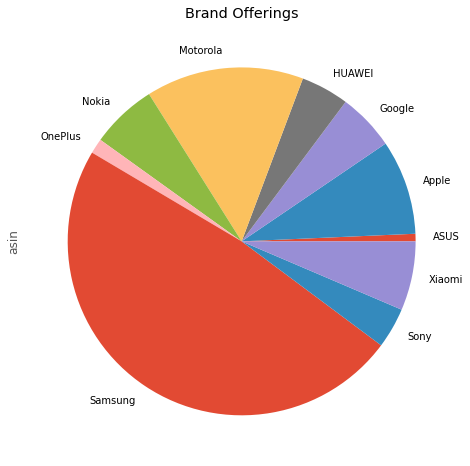

In [5]:
# Plot Brand Offerings of Cell Phones on Amazon

# Pick Style of Plot
plt.style.use("ggplot")

# Determine Brand Distribution
ax = df_items.groupby("brand").count()["asin"].plot(kind="pie", 
                                                 figsize=(12, 8),
                                                 title="Brand Offerings")
plt.show()

As we can see, Amazon's offerings predominantly feature Samsung, Motorola and Apple. 

Let's take a look at the ratings per brand.

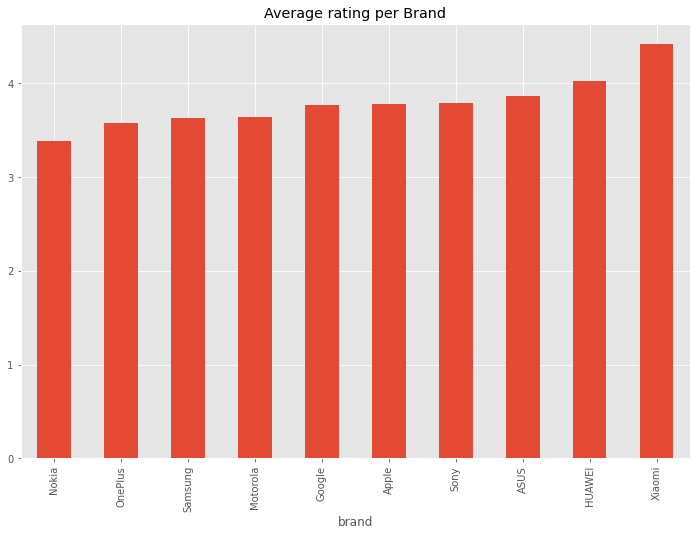

In [6]:
# Plot the Average Brand Raing
ax = df_items.groupby("brand").mean()["rating"].sort_values().plot(kind="bar",
                                                                figsize=(12,8), 
                                                                title="Average rating per Brand")
plt.show()

As shown in the plot above, the highest rated cell phone brands are Xiaomi and HUAWEI. The lowest rated brands are Nokia and OnePlus.

Now let's merge the datasets using 'asin' as the primary key.

In [7]:
# Link Reviews to Items using 'asin' as primary key
df_reviews = pd.merge(df_reviews, df_items, how="left", left_on="asin", right_on="asin")

Now we will rename the columns and show the merged dataset.

In [8]:
# Rename columns for merged dataset
df_reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", 
                        "rating_y": "overall_rating"}, inplace=True)

# Display 1st 5 rows of merged dataset
df_reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0


Now that we have the merged dataset, let's do some data cleaning. We will begin with the datatime structures.

In [9]:
# Fix Datetimes
from datetime import datetime
df_reviews["date"] = df_reviews["date"].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
df_reviews["date"].head()

0   2005-10-11
1   2004-01-07
2   2003-12-30
3   2004-03-18
4   2005-08-28
Name: date, dtype: datetime64[ns]

In [10]:
# Truncate date column to month
df_reviews["month"] = df_reviews["date"].apply(lambda x: x.replace(day=1))
df_reviews["month"].head()

0   2005-10-01
1   2004-01-01
2   2003-12-01
3   2004-03-01
4   2005-08-01
Name: month, dtype: datetime64[ns]

Now let's plot the number of reviews over time.

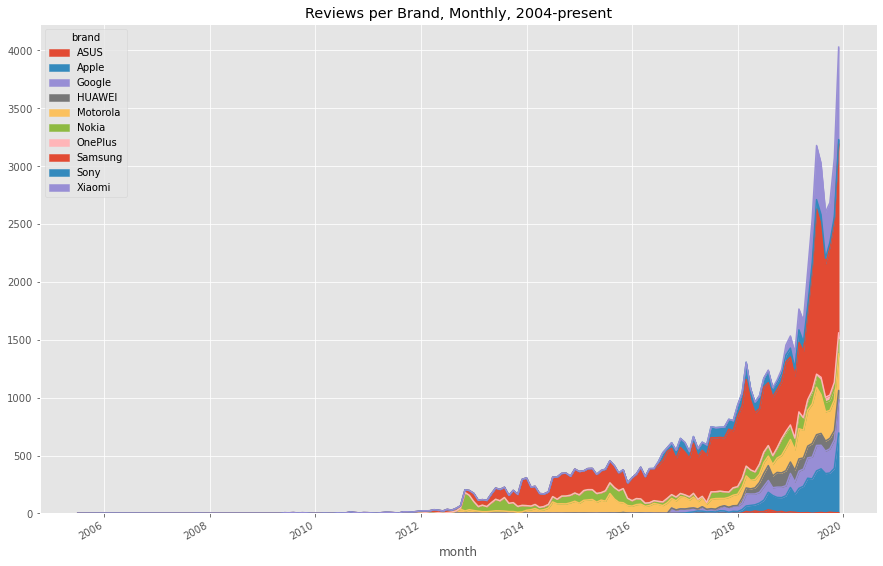

In [11]:
# Plot number of reviews over time
ax = pd.pivot_table(df_reviews, 
                    index="month", 
                    columns="brand", 
                    values="asin", 
                    aggfunc="count", 
                    fill_value=0).plot.area(title="Reviews per Brand, Monthly, 2004-present", figsize=(15, 10))

As we can see, while Samsung and Apple have the most reviws, Xiaomi has the highest rating.

Let's add a positivity column to our dataset.

In [12]:
# Adding a positivity label
df_reviews["positivity"] = df_reviews["rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1))

## Data Cleaning

Here we want to clean up the text in order to better analyze the reviews. Let's first install the needed libraries.

In [13]:
# Install needed libraries
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jmsie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jmsie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now we are going to construct a funciton to process the words in the reviews. First, we need to clean the text by removing excess punctuation, stopwords and non relevant keywords. To accomplish this task, we will use the WordNetLemmatizer method from the NLTK library.

In [14]:
# Review Text

# Define function to preprocess text
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = df_reviews["brand"].apply(lambda x: str(x).lower()).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)
clean_text("I love reading books.")

'love reading book'

As one can see, we converted 'I love reading books' into 'love reading book', making the language easier to process. Now we will apply the clean_text function to the entire dataframe.

In [15]:
# Use preprocess function on dataframe
df_reviews["body"] = df_reviews["body"].astype("str")
df_reviews["clean_text"] = df_reviews["body"].apply(clean_text)

print('Dataframe text cleaned!')

Dataframe text cleaned!


Now that we have the text cleaned, let's look at an example using the first 5 rows.

In [16]:
# Show 1st 5 rows of cleaned text
df_reviews["clean_text"].head().values

array(["a600 awhile absolute doo doo read review detect rage stupid thing finally died used bought garage sale 1 wonder sold cheap bad  hate menu take forever get want scroll endlessly usually phone numbered category u simply press  get want go  pain put silent vibrate class ring turn immediately there's fast way silence damn thing always remember put silent learned hard way  true case mission get break ur nail process also damage case time u try reason started giving problem succeed opening  button could bit bigger vibration could stronger good  reception shabby using elevator remarkable feat considering old would lose service simply putting pocket  compared old work quite well ring tone loud enough hear actually charge quickly great battery life heat like potatoe oven either long convos  nice bright large screen  cute way customize scroll bar set purple pink aqua orange etc overall okay serf purpose definitely pale comparison new phone coming sprint get get great",
       "due softwa